### web crawling
- 1. requests : json : 동적 페이지(URL 변경 없이 데이터를 수정 및 추가) 
- 2. requests : html : 정적 페이지(URL 변경으로 데이터를 수정 및 추가)
- 3. selenium : web browser : 1,2번 방법을 사용하지 못할때 사용

### 1. 네이버 주식 데이터 크롤링
- 코스피 데이터 수집
- 코스닥 데이터 수집
- USD 환율 데이터 수집
- 그래프 그리기
- 상관계수를 확인

#### 크롤링 절차
- 1. 웹서비스 분석 : URL 분석하기
- 2. request, response 하기
- 3. 문자열 json 데이터를 dict로 변경(파싱) 후 데이터프레임으로 생성

In [36]:
import requests

In [37]:
# 1.웹 서비스 분석 :url
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1"

In [38]:
# 2.request,response : json(str)
response = requests.get(url)
response


<Response [200]>

In [39]:
# 3. str데이터를 dict로 파싱 후 데이터 프레임으로 만들기

In [40]:
datas = response.json()["result"]["siseList"]
type(datas),len(datas)

(list, 20)

In [41]:
kospi_df = pd.DataFrame(datas)
kospi_df.tail(3)

,cd,dt,ncv,cv,cr,ov,hv,lv
17,KOSPI,20191217,2195.68,27.53,1.27,2179.40,2196.01,2171.09
18,KOSPI,20191216,2168.15,-2.10,-0.10,2168.05,2175.01,2166.29
19,KOSPI,20191213,2170.25,32.90,1.54,2164.63,2170.25,2159.45


In [42]:
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSDAQ&pageSize=20&page=4"

In [43]:
response = requests.get(url)
response

<Response [200]>

In [44]:
datas = response.json()["result"]["siseList"]
type(datas),len(datas)

(list, 20)

In [45]:
kosdaq_df = pd.DataFrame(datas)
kosdaq_df.tail(3)

,cd,dt,ncv,cv,cr,ov,hv,lv
17,KOSDAQ,20190920,649.07,3.36,0.52,647.50,650.03,645.91
18,KOSDAQ,20190919,645.71,0.59,0.09,646.83,651.45,643.00
19,KOSDAQ,20190918,645.12,0.84,0.13,646.25,648.95,644.32


In [53]:
url = "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd=FX_USDKRW&pageSize=20&page=3"

In [54]:
response = requests.get(url)
response

<Response [200]>

In [55]:
datas = response.json()["result"]["marketIndexDay"]
type(datas),len(datas)

KeyError: 'marketIndexDay'

In [56]:
%matplotlib inline

In [58]:
%config InlineBackend.figure_formats= {'png','retina'}

In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

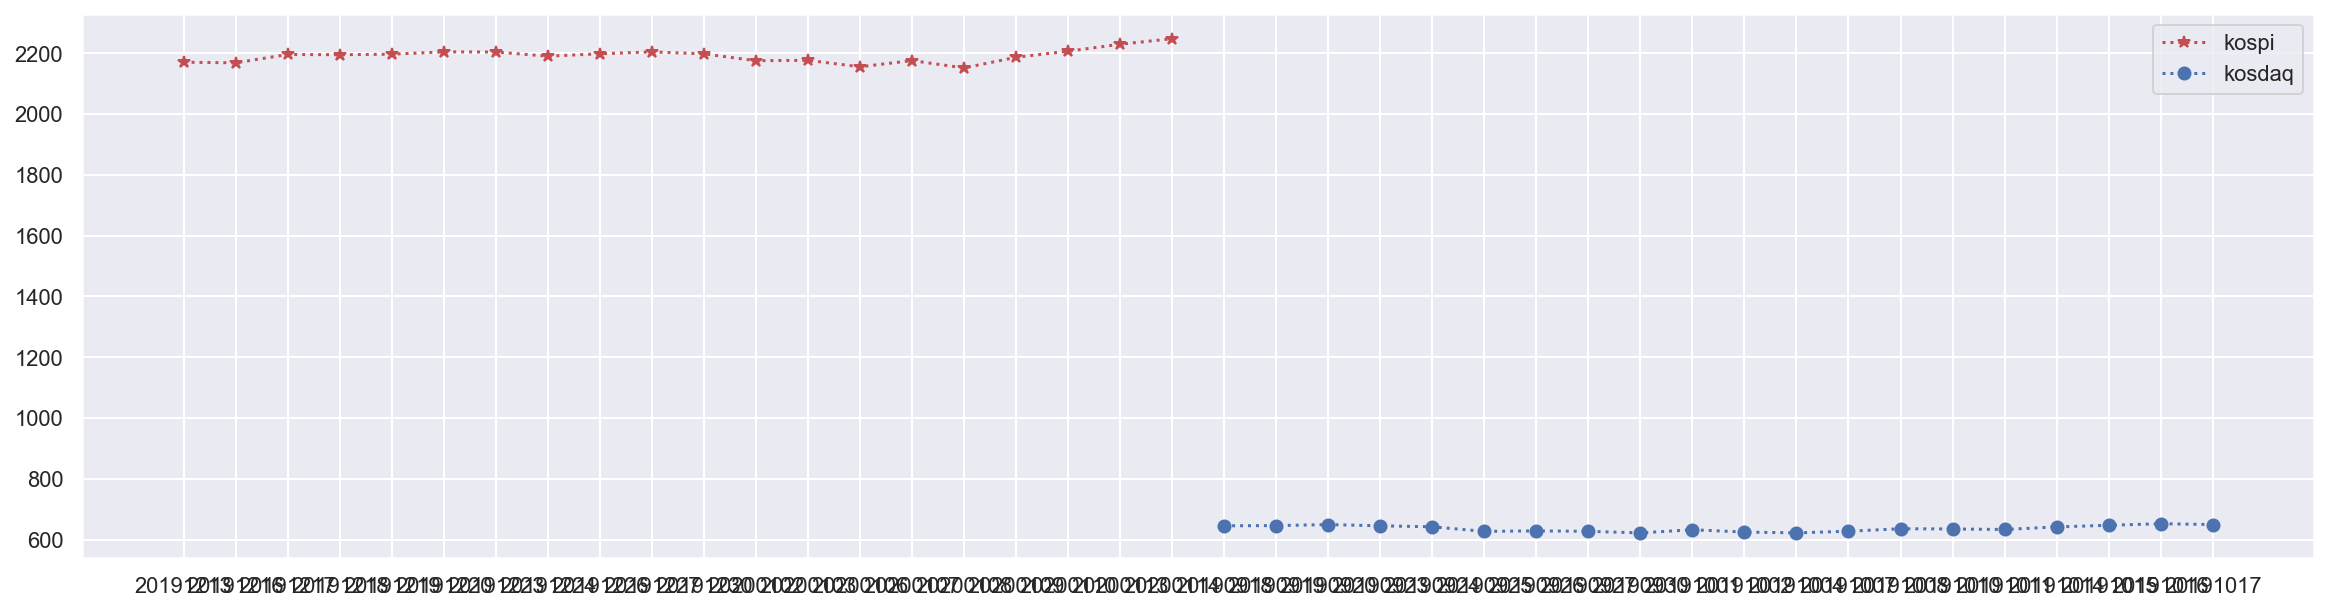

In [66]:
plt.figure(figsize=(20,5))

plt.plot(kospi_df[::-1]["dt"],kospi_df[::-1]["ncv"],"r*:",label="kospi")
plt.plot(kosdaq_df[::-1]["dt"],kosdaq_df[::-1]["ncv"],"bo:",label="kosdaq")
plt.legend(loc=0)
plt.show()

In [60]:
kospi_df["ncv"][:3]

0    2247.51
1    2229.26
2    2206.39
Name: ncv, dtype: float64

### 정규화 : nomalization
- `z = (x - min(x)) / (max(x) - min(x))`

In [67]:
from sklearn import preprocessing

In [68]:
preprocessing.minmax_scale(kospi_df[::-1]["ncv"])

array([0.1968815 , 0.17505198, 0.46122661, 0.4516632 , 0.47037422,
       0.5495842 , 0.54469854, 0.40301455, 0.48461538, 0.54989605,
       0.48191268, 0.24802495, 0.26143451, 0.03908524, 0.2518711 ,
       0.        , 0.36528067, 0.57255717, 0.81029106, 1.        ])

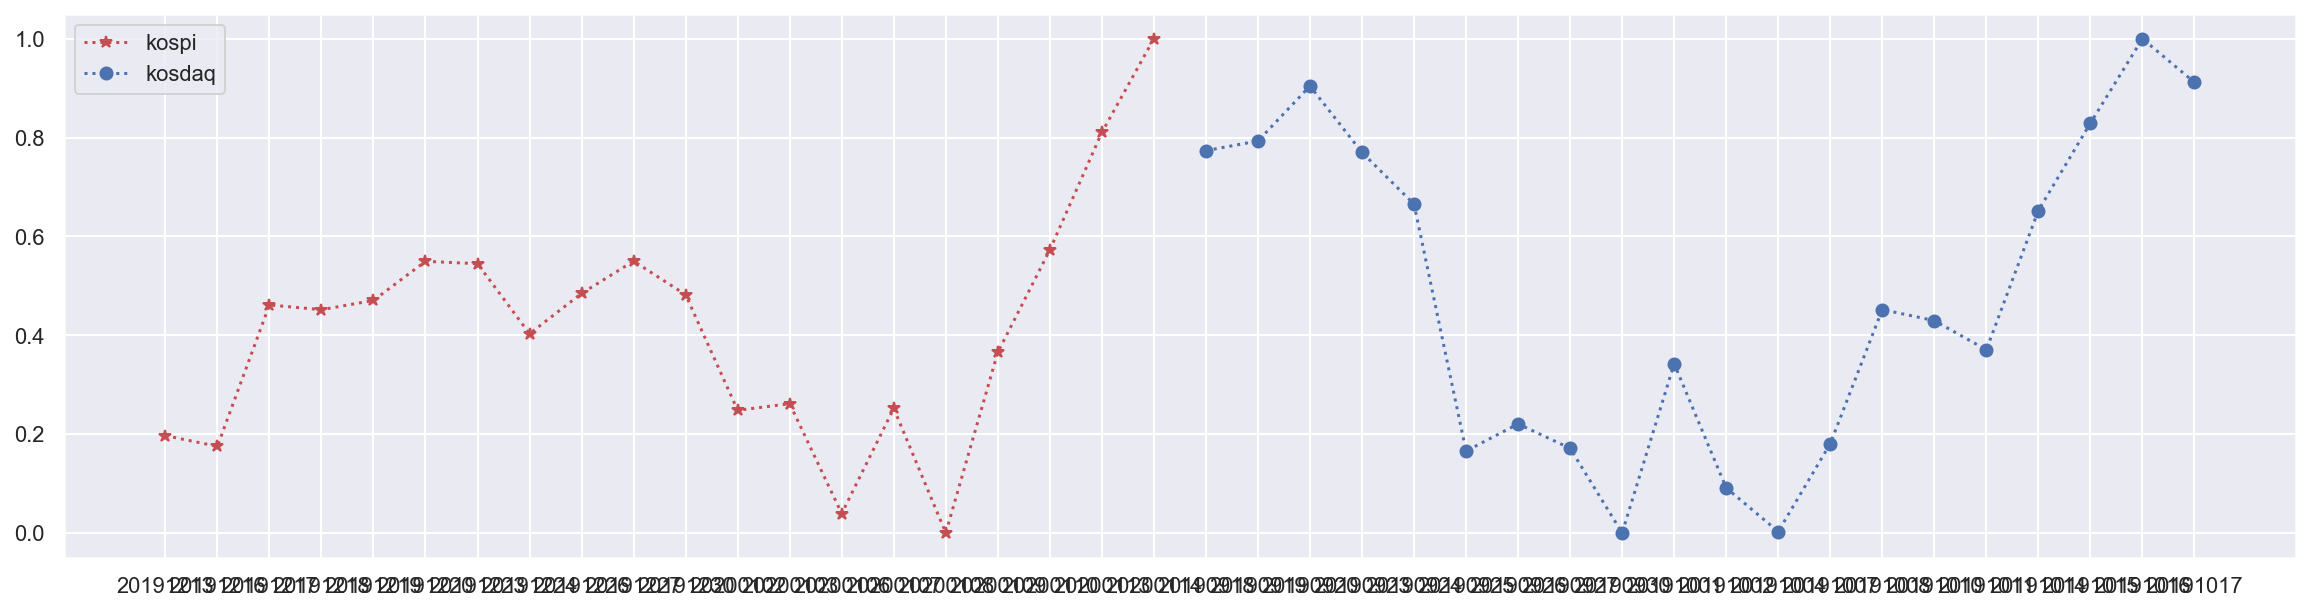

In [72]:
plt.figure(figsize=(20,5))

plt.plot(kospi_df[::-1]["dt"],preprocessing.minmax_scale(kospi_df[::-1]["ncv"]),"r*:",
         label="kospi")
plt.plot(kosdaq_df[::-1]["dt"],preprocessing.minmax_scale(kosdaq_df[::-1]["ncv"]),"bo:",label="kosdaq")
plt.legend(loc=0)
plt.show()

In [73]:
import numpy as np

In [74]:
np.corrcoef(kospi_df["ncv"],kosdaq_df["ncv"])[0,1]

0.29519315979082833